# C_Modeling

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

np.random.seed(42)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_full = pd.read_csv('./2017_full.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list(df_full.columns)

['Unnamed: 0',
 'level_0',
 'index',
 'HearingDate',
 'HearingResult',
 'HearingPlea',
 'HearingContinuanceCode',
 'HearingType',
 'HearingCourtroom',
 'fips',
 'FiledDate',
 'Locality',
 'Status',
 'DefenseAttorney',
 'Address',
 'Gender',
 'Race',
 'Charge',
 'CodeSection',
 'CaseType',
 'Class',
 'OffenseDate',
 'ArrestDate',
 'Complainant',
 'AmendedCharge',
 'AmendedCode',
 'AmendedCaseType',
 'FinalDisposition',
 'SentenceTime',
 'SentenceSuspendedTime',
 'ProbationType',
 'ProbationTime',
 'ProbationStarts',
 'OperatorLicenseSuspensionTime',
 'RestrictionEffectiveDate',
 'RestrictionEndDate',
 'OperatorLicenseRestrictionCodes',
 'Fine',
 'Costs',
 'FineCostsDue',
 'FineCostsPaid',
 'FineCostsPaidDate',
 'VASAP',
 'FineCostsPastDue',
 'person_id',
 'HadLawyer',
 'PublicDefender',
 'Contested',
 'Outcome_Positive',
 'Amended',
 'Total_Positive',
 'person_id_freq',
 'prior_hearings',
 'TimeSinceOffense',
 'Court',
 'full_fips',
 'ChargeType']

In [4]:
# dummying variables
df_dummied = pd.get_dummies(df_full, columns = ['Court', 'Gender', 'Race',
                                                'ChargeType'], drop_first = True)

In [5]:
# slicing dataframe to just the records contested
df_model = df_dummied[df_dummied['Contested'] == 1]

In [6]:
# setting X and y variables
y = df_model['Total_Positive']

X = df_model.drop(columns = ['Unnamed: 0',
 'level_0',
 'index',
 'HearingDate',
 'HearingResult',
  'HearingPlea',
 'HearingContinuanceCode',
 'HearingType',
 'HearingCourtroom',
 'fips',
 'FiledDate',
 'Locality',
 'Status',
 'DefenseAttorney',
 'Address',
 'Charge',
 'CodeSection',
 'CaseType',
 'Class',
 'OffenseDate',
 'ArrestDate',
 'Complainant',
 'AmendedCharge',
 'AmendedCode',
 'AmendedCaseType',
 'FinalDisposition',
 'SentenceTime',
 'SentenceSuspendedTime',
 'ProbationType',
 'ProbationTime',
 'ProbationStarts',
 'OperatorLicenseSuspensionTime',
 'RestrictionEffectiveDate',
 'RestrictionEndDate',
 'OperatorLicenseRestrictionCodes',
 'Fine',
 'Costs',
 'FineCostsDue',
 'FineCostsPaid',
 'FineCostsPaidDate',
 'VASAP',
 'FineCostsPastDue',
 'person_id',
 #'HadLawyer',
 #'PublicDefender',
 'Contested',
 'Outcome_Positive',
 'Amended',
 'Total_Positive',
 'person_id_freq',
 #'prior_hearings',
 'TimeSinceOffense',
 'full_fips'])

In [7]:
# checking to make sure no nulls
X.isnull().sum().head()

HadLawyer                 0
PublicDefender            0
prior_hearings            0
Court_Albemarle County    0
Court_Alexandria City     0
dtype: int64

In [8]:
# setting list of features
features = X.columns
features

Index(['HadLawyer', 'PublicDefender', 'prior_hearings',
       'Court_Albemarle County', 'Court_Alexandria City',
       'Court_Alleghany County', 'Court_Amelia County', 'Court_Amherst County',
       'Court_Appomatox County', 'Court_Arlington County',
       ...
       'ChargeType_MIS: Public Intoxication/Swearing',
       'ChargeType_MIS: Reckless Driving',
       'ChargeType_MIS: Resisting Arrest, Falsely Identifying, Obstruction',
       'ChargeType_MIS: Speeding', 'ChargeType_MIS: Weapon-related Offense',
       'ChargeType_VIOL: Animal Violations',
       'ChargeType_VIOL: Boating Certification Issue',
       'ChargeType_VIOL: Other',
       'ChargeType_VIOL: Refused Blood/Breathalizer Test',
       'ChargeType_VIOL: Smoking Violation'],
      dtype='object', length=191)

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [10]:
# checking baseline (59% positive outcome)
y_train.value_counts(normalize = True)

1    0.592879
0    0.407121
Name: Total_Positive, dtype: float64

In [11]:
# same for test
y_test.value_counts(normalize = True)

1    0.592877
0    0.407123
Name: Total_Positive, dtype: float64

In [12]:
# standard scale
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression

In [13]:
logreg = LogisticRegression(penalty = 'l2')

In [14]:
logreg.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
cv_scores = cross_val_score(logreg, X_train_sc, y_train)
print("Train CV Scores:", cv_scores)
print("Average Train CV Score:", cv_scores.mean())

Train CV Scores: [0.64932462 0.64684142 0.64730504]
Average Train CV Score: 0.6478236923175554


In [16]:
cv_scores = cross_val_score(logreg, X_test_sc, y_test)
print("Test CV Scores:", cv_scores)
print("Average Test CV Score:", cv_scores.mean())

Test CV Scores: [0.64874309 0.64680026 0.64815409]
Average Test CV Score: 0.6478991468640851


Our train and test scores are pretty close so I don't think there's overfitting here. Accuracy is about 5% over baseline, which isn't great but also not terrible.

In [17]:
coefficients = logreg.coef_

In [18]:
coef_df = pd.DataFrame(coefficients, columns = features).T

In [19]:
def log_odds(x):
    return np.exp(x)

In [20]:
coef_df['change_odds_ratio'] = coef_df.apply(lambda x: log_odds(x))

In [21]:
coef_df.rename(columns = {0: 'logreg_coefficient'}, inplace = True)

In [22]:
coef_df.sort_values(by = 'logreg_coefficient').head()

,logreg_coefficient,change_odds_ratio
Race_Black(Non-Hispanic),-0.293837,0.745398
Race_White Caucasian(Non-Hispanic),-0.209305,0.811148
Race_Hispanic,-0.191559,0.825671
ChargeType_MIS: DWI/DUI,-0.143271,0.866519
ChargeType_INF: Seatbelt,-0.135763,0.873050


According to the Logistic Regression, race (Black, White, and Latino), and getting charged with a DWI/DUI or Seatbelt Infraction are the most negative coefficients.

In [23]:
coef_df.sort_values(by = 'logreg_coefficient').tail()

,logreg_coefficient,change_odds_ratio
ChargeType_MIS: Speeding,0.212313,1.236535
ChargeType_INF: License/Permit/Tag Issues,0.226128,1.253737
HadLawyer,0.236600,1.266934
ChargeType_INF: Speeding,0.322679,1.380822
ChargeType_INF: Expired Registration/Inspection,0.441684,1.555324


According to the Logistic Regression, the most positive coefficients are getting charged with speeding, license/permit issues, and expired registration/inspection infractions, and having a lawyer. 

##### Evaluating Confusion Matrix

In [24]:
prob_preds = logreg.predict_proba(X_test_sc)
prob_preds

array([[0.33605709, 0.66394291],
       [0.33848645, 0.66151355],
       [0.58343697, 0.41656303],
       ...,
       [0.39069661, 0.60930339],
       [0.64348126, 0.35651874],
       [0.3349075 , 0.6650925 ]])

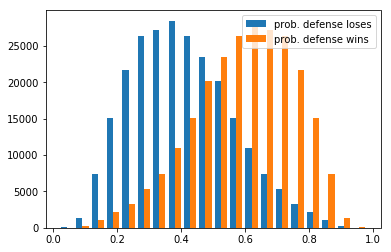

In [25]:
plt.hist(prob_preds, bins = 20)
plt.legend(['prob. defense loses', 'prob. defense wins']);

In [26]:
outcome_preds = logreg.predict(X_test_sc)

In [27]:
confusion_matrix(y_test, outcome_preds)

array([[ 39462,  59458],
       [ 26102, 117951]])

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, outcome_preds).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print("-----")
print("Accuracy: %s" % ((tp + tn) / (tn + fp + fn + tp)))
print("Misclassification Rate: %s" % ((fp + fn) / (tn + fp + fn + tp)))
print("-----")
print("Sensitivity/Recall (True Positive Rate): %s" % ((tp) / (tp + fn)))
print("Specificity (True Negative Rate): %s" % ((tn) / (tn + fp)))
print("False Positive Rate: %s" % ((fp) / (tp + fn)))
print("Precision: %s" % ((tp) / (tp + fp)))

True Negatives: 39462
False Positives: 59458
False Negatives: 26102
True Positives: 117951
-----
Accuracy: 0.6478621081354718
Misclassification Rate: 0.35213789186452815
-----
Sensitivity/Recall (True Positive Rate): 0.8188028017465794
Specificity (True Negative Rate): 0.39892842701172665
False Positive Rate: 0.41275086252976334
Precision: 0.6648535305424189


If we were to use a model to make recommendations to people who didn't have to contest their charges on whether or not to go to court (and risk having to pay court fees on top of their fines and a lawyer), we would want to be minimizing our False Positives (so get our Precision rate closer to 1.)

## Decision Tree

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
# training scores
cv_scores = cross_val_score(dt, X_train_sc, y_train)
print("Train CV Scores:", cv_scores)
print("Average Train CV Score:", cv_scores.mean())

Train CV Scores: [0.66183213 0.66000337 0.65950809]
Average Train CV Score: 0.6604478655048932


In [32]:
# test scores
cv_scores = cross_val_score(logreg, X_test_sc, y_test)
print("Test CV Scores:", cv_scores)
print("Average Test CV Score:", cv_scores.mean())

Test CV Scores: [0.64874309 0.64680026 0.64815409]
Average Test CV Score: 0.6478991468640851


The Decision Tree doesn't seem to be doing better than the Logistic Regression on the test data; I think the existing model is too simple.

In [33]:
dt.n_features_

191

In [34]:
importances = dt.feature_importances_
importance_dict = dict(zip(features, importances))

In [35]:
importance_dict

{'HadLawyer': 0.046888600894841884,
 'PublicDefender': 0.0139380890356805,
 'prior_hearings': 0.14033090679332494,
 'Court_Albemarle County': 0.00477692369987204,
 'Court_Alexandria City': 0.005441427354724118,
 'Court_Alleghany County': 0.0018873896807681178,
 'Court_Amelia County': 0.0013748987557939951,
 'Court_Amherst County': 0.0025700946424700483,
 'Court_Appomatox County': 0.0013763653406624879,
 'Court_Arlington County': 0.004843699639094628,
 'Court_Augusta County': 0.003495467331180993,
 'Court_Bath County': 0.0007254007730185322,
 'Court_Bedford County': 0.0025394096052179407,
 'Court_Bland County': 0.0035811151799375954,
 'Court_Botetourt County': 0.0021882352388731094,
 'Court_Bristol City': 0.0018753599163020293,
 'Court_Brunswick County': 0.0044855161404362106,
 'Court_Buchanan County': 0.001599722031381701,
 'Court_Buckingham County': 0.0014393430635976476,
 'Court_Buena Vista City': 0.0010309456696787859,
 'Court_Campbell County': 0.0024704820093603163,
 'Court_Carolin

The features that had the greatest feature importance weight: 
- 'prior_hearings': 0.1403
- 'HadLawyer': 0.0468
- 'ChargeType_INF: Expired Registration/Inspection': 0.0400
- 'Gender_Male': 0.0370
- 'ChargeType_INF: Speeding': 0.0260
- 'Race_White Caucasian(Non-Hispanic)': 0.0243
- 'Race_Black(Non-Hispanic)': 0.0235
- 'Court_Fairfax County': 0.0225
- 'ChargeType_INF: Seatbelt': 0.0200
- 'ChargeType_MIS: DWI/DUI': 0.0150
- 'PublicDefender': 0.0138
- 'Court_Greensville County': 0.0130
- 'ChargeType_INF: License/Permit/Tag Issues': 0.0109
- 'Race_Hispanic': 0.0105
- 'ChargeType_MIS: No License/Registration/Insurance': 0.0101

## Random Forest

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# training scores
cv_scores = cross_val_score(rf, X_train_sc, y_train)
print("Train CV Scores:", cv_scores)
print("Average Train CV Score:", cv_scores.mean())

Train CV Scores: [0.66675858 0.66383919 0.66332746]
Average Train CV Score: 0.6646417456107995


In [39]:
# test scores
cv_scores = cross_val_score(logreg, X_test_sc, y_test)
print("Test CV Scores:", cv_scores)
print("Average Test CV Score:", cv_scores.mean())

Test CV Scores: [0.64874309 0.64680026 0.64815409]
Average Test CV Score: 0.6478991468640851


## A/B Testing

1. Is there a statistically significant difference between outcomes based only on race?

Given the simplicity of the model, I want to look more specifically at one charge compared against different court districts in densely populated areas and more rural areas to see if there are statistically significant differences in outcomes based on race. Since speeding infractions are so prevalent, I'll use those for comparison.

In [40]:
# INF: Speeding 
# counties around the three main population centers in Virginia
fairfax_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                                (df_full['Court'] == 'Fairfax County')]

vabeach_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                                (df_full['Court'] == 'Virginia Beach City')]

henrico_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                             (df_full['Court'] == 'Henrico County')]

# more rural counties
henry_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                           (df_full['Court'] == 'Henry County')]

augusta_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                             (df_full['Court'] == 'Augusta County')]

wythe_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                             (df_full['Court'] == 'Wythe County')]

In [41]:
# racial disparity in Fairfax County
stats.f_oneway(fairfax_speedingINF[(fairfax_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (fairfax_speedingINF['Contested'] == 1)]['Total_Positive'],
              fairfax_speedingINF[(fairfax_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (fairfax_speedingINF['Contested'] == 1)]['Total_Positive'],
              fairfax_speedingINF[(fairfax_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (fairfax_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=49.414661785077506, pvalue=4.764734641753867e-22)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for different racial groups going to court in Fairfax to fight speeding infraction tickets is the same. 

In [42]:
# racial disparity in Henry County
stats.f_oneway(henry_speedingINF[(henry_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (henry_speedingINF['Contested'] == 1)]['Total_Positive'],
              henry_speedingINF[(henry_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (henry_speedingINF['Contested'] == 1)]['Total_Positive'],
              henry_speedingINF[(henry_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (henry_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=2.431726949967602, pvalue=0.08896922141236538)

Using a significance level of $\alpha = 0.05$,  the p-value is not small enought to reject the null hypothesis that the average outcome for different racial groups going to court in Henry County to fight speeding infraction tickets is the same. 

In [43]:
# racial disparity in Henrico County
stats.f_oneway(henrico_speedingINF[(henrico_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (henrico_speedingINF['Contested'] == 1)]['Total_Positive'],
              henrico_speedingINF[(henrico_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (henrico_speedingINF['Contested'] == 1)]['Total_Positive'],
              henrico_speedingINF[(henrico_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (henrico_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=63.6800813638227, pvalue=4.3776525144221755e-28)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for different racial groups going to court in Henrico County to fight speeding infraction tickets is the same. 

In [44]:
# racial disparity in Virginia Beach
stats.f_oneway(vabeach_speedingINF[(vabeach_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (vabeach_speedingINF['Contested'] == 1)]['Total_Positive'],
              vabeach_speedingINF[(vabeach_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (vabeach_speedingINF['Contested'] == 1)]['Total_Positive'],
              vabeach_speedingINF[(vabeach_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (vabeach_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=71.82730940264267, pvalue=3.3567634267641767e-31)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for different racial groups going to court in Virginia Beach to fight speeding infraction tickets is the same. 

In [45]:
# racial disparity in Augusta County
stats.f_oneway(augusta_speedingINF[(augusta_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (augusta_speedingINF['Contested'] == 1)]['Total_Positive'],
              augusta_speedingINF[(augusta_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (augusta_speedingINF['Contested'] == 1)]['Total_Positive'],
              augusta_speedingINF[(augusta_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (augusta_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=10.71729880917922, pvalue=2.5050444229040484e-05)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for different racial groups going to court in Augusta County to fight speeding infraction tickets is the same. 

In [46]:
# racial disparity in Wythe County
stats.f_oneway(wythe_speedingINF[(wythe_speedingINF['Race'] == 
                                   'White Caucasian(Non-Hispanic)') &
                                  (wythe_speedingINF['Contested'] == 1)]['Total_Positive'],
              wythe_speedingINF[(wythe_speedingINF['Race'] == 
                                   'Black(Non-Hispanic)') & 
                                 (wythe_speedingINF['Contested'] == 1)]['Total_Positive'],
              wythe_speedingINF[(wythe_speedingINF['Race'] == 
                                   'Hispanic') & 
                                  (wythe_speedingINF['Contested'] == 1)]['Total_Positive'])

F_onewayResult(statistic=1.936145955760662, pvalue=0.1445334069650812)

Using a significance level of $\alpha = 0.05$,  the p-value is not small enought to reject the null hypothesis that the average outcome for different racial groups going to court in Wythe County to fight speeding infraction tickets is the same. 

##### Demographic makeup of 6 Counties' Speeding Infraction caseloads

In [47]:
fairfax_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.621266
Black(Non-Hispanic)                        0.191439
Asian Or Pacific Islander                  0.073240
Hispanic                                   0.055793
Other(Includes Not Applicable, Unknown)    0.054306
American Indian                            0.003957
Name: Race, dtype: float64

In [48]:
vabeach_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.602959
Black(Non-Hispanic)                        0.323413
Other(Includes Not Applicable, Unknown)    0.026492
Asian Or Pacific Islander                  0.025116
Hispanic                                   0.020815
American Indian                            0.001204
Name: Race, dtype: float64

In [49]:
henrico_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.495451
Black(Non-Hispanic)                        0.437254
Asian Or Pacific Islander                  0.032131
Other(Includes Not Applicable, Unknown)    0.016775
Hispanic                                   0.015291
American Indian                            0.003097
Name: Race, dtype: float64

In [50]:
henry_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.642064
Black(Non-Hispanic)                        0.322974
Hispanic                                   0.026082
Other(Includes Not Applicable, Unknown)    0.004994
Asian Or Pacific Islander                  0.003885
Name: Race, dtype: float64

In [51]:
augusta_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.854946
Black(Non-Hispanic)                        0.102115
Hispanic                                   0.022431
Other(Includes Not Applicable, Unknown)    0.013031
Asian Or Pacific Islander                  0.005127
American Indian                            0.002350
Name: Race, dtype: float64

In [52]:
wythe_speedingINF['Race'].value_counts(normalize = True)

White Caucasian(Non-Hispanic)              0.812587
Black(Non-Hispanic)                        0.142391
Other(Includes Not Applicable, Unknown)    0.018315
Hispanic                                   0.017316
Asian Or Pacific Islander                  0.007259
American Indian                            0.002131
Name: Race, dtype: float64

2. Is there a statistically significant difference in outcomes when a defendant is represented by a private lawyer or public defender?

For this question, I'll look at three different types of charges and compare outcomes with no lawyers, with private lawyers, and with public defenders.

In [53]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [54]:
# looking for counties that have public defenders for comparison to Fairfax
df_full[(df_full['HadLawyer'] == 1) & (df_full['PublicDefender'] == 1)]['Court'].value_counts().head()

Virginia Beach City    8955
Fairfax County         7104
Newport News City      5524
Norfolk City           4549
Roanoke City           3704
Name: Court, dtype: int64

In [55]:
# Fairfax County, three different charges
fairfax_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                                (df_full['Court'] == 'Fairfax County') &
                             (df_full['Contested'] == 1)]

fairfax_drugsMIS = df_full[(df_full['ChargeType'] == 'MIS: Drug-related Offenses') &
                                (df_full['Court'] == 'Fairfax County') &
                          (df_full['Contested'] == 1)]

fairfax_recklessMIS = df_full[(df_full['ChargeType'] == 'MIS: Reckless Driving') &
                             (df_full['Court'] == 'Fairfax County') &
                             (df_full['Contested'] == 1)]

# Henry County
newport_speedingINF = df_full[(df_full['ChargeType'] == 'INF: Speeding') &
                                (df_full['Court'] == 'Newport News City') &
                           (df_full['Contested'] == 1)]

newport_drugsMIS = df_full[(df_full['ChargeType'] == 'MIS: Drug-related Offenses') &
                                (df_full['Court'] == 'Newport News City') &
                        (df_full['Contested'] == 1)]

newport_recklessMIS = df_full[(df_full['ChargeType'] == 'MIS: Reckless Driving') &
                             (df_full['Court'] == 'Newport News City') &
                           (df_full['Contested'] == 1)]

##### Speeding Infractions

In [56]:
# hiring a lawyer for a speeding ticket in Fairfax County
stats.f_oneway(fairfax_speedingINF[(fairfax_speedingINF['HadLawyer'] == 1) & # private lawyer
                                   (fairfax_speedingINF['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_speedingINF[(fairfax_speedingINF['HadLawyer'] == 0) & # self-defense
                                  (fairfax_speedingINF['PublicDefender'] == 0)]['Total_Positive'])

F_onewayResult(statistic=1278.5756090553475, pvalue=1.2297263345182284e-261)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for people who hire lawyers and don't hire lawyers to fight speeding tickets in Fairfax Virginia is the same.

In [57]:
# hiring a lawyer for a speeding ticket in Henry County
stats.f_oneway(newport_speedingINF[(newport_speedingINF['HadLawyer'] == 1) & # private lawyer
                                   (newport_speedingINF['PublicDefender'] == 0)]['Total_Positive'],
              newport_speedingINF[(newport_speedingINF['HadLawyer'] == 0) & # self-defense
                                  (newport_speedingINF['PublicDefender'] == 0)]['Total_Positive'])

F_onewayResult(statistic=66.02812227596685, pvalue=6.426898636843304e-16)

Using a significance level of $\alpha = 0.05$,  the p-value is sufficiently small that we can reject the null hypothesis that the average outcome for people who hire lawyers and don't hire lawyers to fight speeding tickets in Henry County is the same.

##### Drug-related Offenses

In [58]:
# hiring a lawyer for a drug-related offense in Fairfax County
stats.f_oneway(fairfax_drugsMIS[(fairfax_drugsMIS['HadLawyer'] == 1) & # private lawyer
                                   (fairfax_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_drugsMIS[(fairfax_drugsMIS['HadLawyer'] == 0) & # self-defense
                                  (fairfax_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_drugsMIS[(fairfax_drugsMIS['HadLawyer'] == 1) & # public defender
                                  (fairfax_drugsMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=608.8808166317361, pvalue=9.031328961742285e-232)

In [59]:
# hiring a lawyer/public defender for a drug-related offense in Fairfax
stats.f_oneway(fairfax_drugsMIS[(fairfax_drugsMIS['HadLawyer'] == 1) & # private lawyer
                                   (fairfax_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_drugsMIS[(fairfax_drugsMIS['HadLawyer'] == 1) & # public defender
                                  (fairfax_drugsMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=13.880510532634252, pvalue=0.00019872852226414953)

The p-value is significantly small enough in the first test to reject the null hypothesis that outcomes are the same whether someone defends themselves against a drug charge, hires a lawyer, or a public defender. Looking at the second test, the p-value is not sufficiently small to reject the null hypothesis (that outcomes for those who hired private lawyers and public defenders is the same). 

In [60]:
# hiring a lawyer for a drug-related offense in Fairfax County
stats.f_oneway(newport_drugsMIS[(newport_drugsMIS['HadLawyer'] == 1) & # private lawyer
                                   (newport_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              newport_drugsMIS[(newport_drugsMIS['HadLawyer'] == 0) & # self-defense
                                  (newport_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              newport_drugsMIS[(newport_drugsMIS['HadLawyer'] == 1) & # public defender
                                  (newport_drugsMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=19.85303531798002, pvalue=4.123193944983392e-09)

In [61]:
# hiring a lawyer for a drug-related offense in Fairfax County
stats.f_oneway(newport_drugsMIS[(newport_drugsMIS['HadLawyer'] == 1) & # private lawyer
                                   (newport_drugsMIS['PublicDefender'] == 0)]['Total_Positive'],
              newport_drugsMIS[(newport_drugsMIS['HadLawyer'] == 1) & # public defender
                                  (newport_drugsMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=28.990864084843896, pvalue=1.083397946909075e-07)

Looking at the first test, the p-value is sufficiently small to reject the null hypothesis that there is a difference in outcomes for defendants fighting drug charges in Newport News based on whether they hired lawyers, defended themselves, or had public defenders. So outcomes are probably different; in the second test, the p-value is still sufficiently small for us to reject the null that there is no difference between hiring a private lawyer and public defender.

##### Reckless Driving

In [62]:
# hiring a lawyer for reckless driving in Fairfax County
stats.f_oneway(fairfax_recklessMIS[(fairfax_recklessMIS['HadLawyer'] == 1) & # private lawyer
                                   (fairfax_recklessMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_recklessMIS[(fairfax_recklessMIS['HadLawyer'] == 0) & # self-defense
                                  (fairfax_recklessMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_recklessMIS[(fairfax_recklessMIS['HadLawyer'] == 1) & # public defender
                                  (fairfax_recklessMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=885.0497734980366, pvalue=0.0)

In [63]:
# hiring a lawyer for reckless driving in Fairfax County
stats.f_oneway(fairfax_recklessMIS[(fairfax_recklessMIS['HadLawyer'] == 1) & # private lawyer
                                   (fairfax_recklessMIS['PublicDefender'] == 0)]['Total_Positive'],
              fairfax_recklessMIS[(fairfax_recklessMIS['HadLawyer'] == 1) & # public defender
                                  (fairfax_recklessMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=319.8426900258519, pvalue=1.5447372231142508e-69)

The p-value is significantly small to reject the null hypothesis and accept the alternative (that there is a statistically significant difference in outcome for reckless driving cases in Fairfax County based on whether someone hires a lawyer, defends themselves, or hires a public defender.)

In [64]:
# hiring a lawyer for a drug-related offense in Fairfax County
stats.f_oneway(newport_recklessMIS[(newport_recklessMIS['HadLawyer'] == 1) & # private lawyer
                                   (newport_recklessMIS['PublicDefender'] == 0)]['Total_Positive'],
              newport_recklessMIS[(newport_recklessMIS['HadLawyer'] == 0) & # self-defense
                                  (newport_recklessMIS['PublicDefender'] == 0)]['Total_Positive'],
              newport_recklessMIS[(newport_recklessMIS['HadLawyer'] == 1) & # public defender
                                  (newport_recklessMIS['PublicDefender'] == 1)]['Total_Positive'])

F_onewayResult(statistic=2.131339280144721, pvalue=0.12545274656026734)

The p-value is not sufficiently small to reject the null hypothesis that the average outcome for reckless driving defendants is the same (whether they hire private lawyers, public defenders, or defend themselves.)